# Tutorial 5: Chromaticity correction and non-linearities.

# Objectives
#### - Introduce sextupoles in the FODO cell for chromaticity correction.

<div>
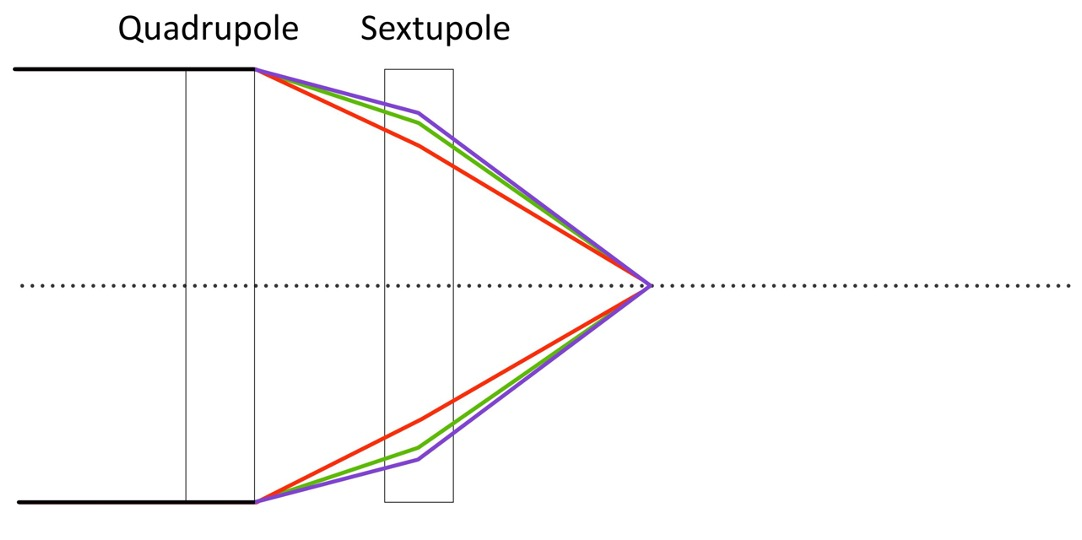
</div>

#### - Non-linearities impact on the beam dynamics.

# Questions
#### 1. Add 0.5 m long sextupole attached to the two qudrupoles of the lattice defined on Tutorial 3. With a matching block adjust the vertical and horizontal chromaticity of the cell (global parameters: DQ1 and DQ2) to zero, by powering the two sextupoles ($K2_1$ and $K2_1$).

<div>
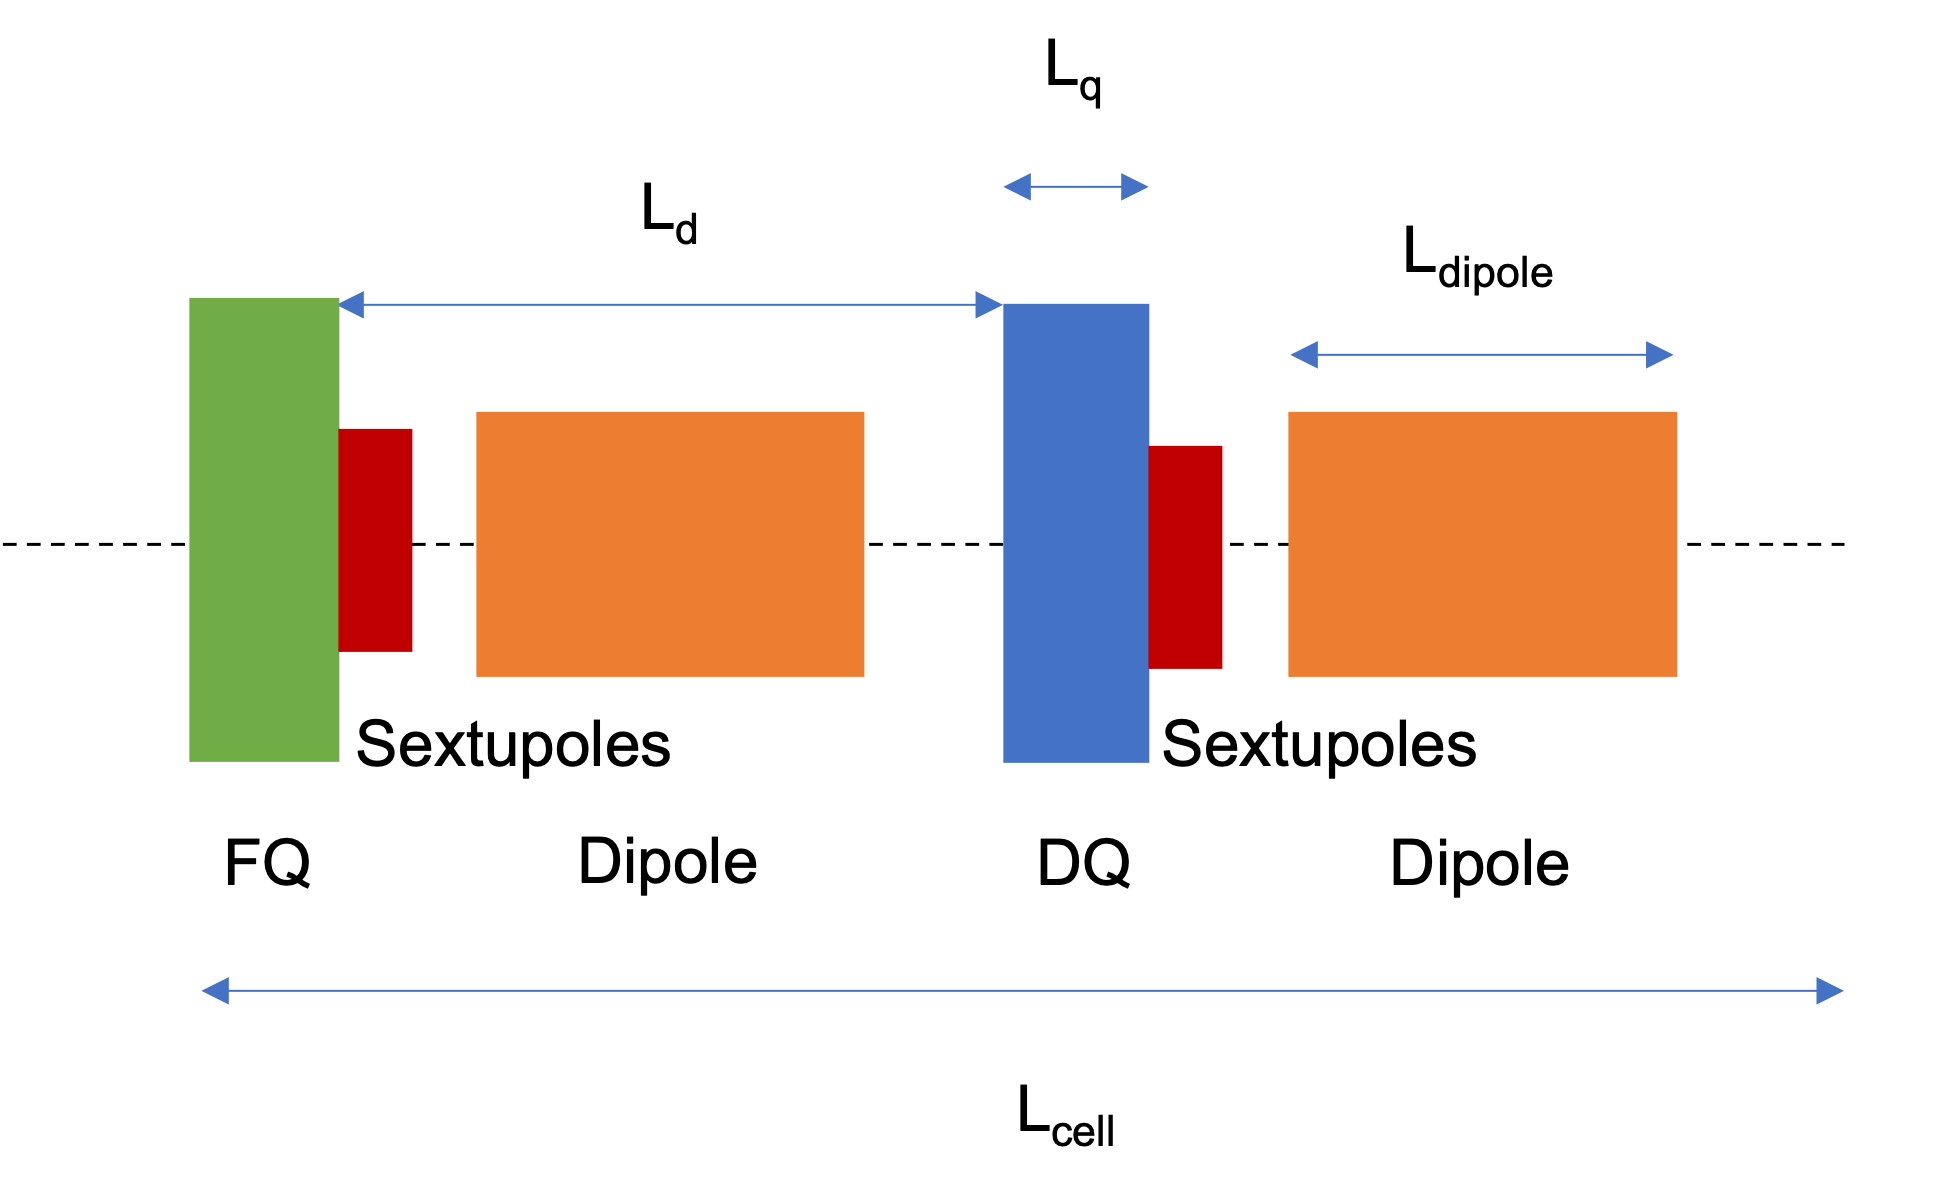
</div>

#### 2. Using the 𝐾21 and 𝐾21, 𝛽-function and dispersion at the sextupole location, evaluate using the formula the sextupolar effect on the Q1 for a particle at DELTAP=0.01. Compare with the results obtained in the Tutorial 4.
#### 3. Track a particle with initial coordinates x,y,px,py = (1,1,0,0) mm in 100 cells and DELTAP=0.01. Plot the x-px phase space. Did you manage to recover the original tune for the off-momentum particle?
#### Q4. Track a particle with initial coordinates x,y,px,py=(100,100,0,0). How does the particle move in the phase space, cell after cell? Do you see the tunes? What is going on?
#### **BONUS**
#### 5. Move the tunes to (0.23, 0.23) and repeat the previous point. Is now the particle stable?

# Python libraries 

In [1]:
#########################################
# Python libraries                      #
#########################################
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

#########################################
# Cpymad library                        #
#########################################
from cpymad.madx import Madx 

# Python plot commands

#### You can copy/paste, uncomment and apply the example below for plotting:

In [2]:
###########################
#### Plot example code ####
###########################

#### To change the size of the plot window
# plt.rcParams['figure.dpi'] = 100

#### Plot command
# plt.plot(x,y,'ob',label='Example')

#### Adding labels
# plt.xlabel('s[m]')
# plt.ylabel('[m]')

#### Adding a legend
# plt.legend(loc='best')

# Launching MAD-X

In [3]:
# madx = Madx(stdout=True)
madx = Madx()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2022.12.06 17:12:27      +
  ++++++++++++++++++++++++++++++++++++++++++++


# Methods in the Madx class from cpymad library to be used:

#### To run the MAD-X lattice input file:

`madx.call('name_of_the_file.madx')`

#### To save the MAD-X output data from the TWISS and SUMM tables into a pandas dataframe: 

`madx.table.twiss.dframe()`

`madx.table.summ.dframe()`

#### To run a MAD-X command from the Jupyter-notebook: 

`madx.input("MAD-X command")`

# Questions

#### 1. Add 0.5 m long sextupole attached to the two qudrupoles of the lattice defined on Tutorial 3. With a matching block adjust the vertical and horizontal chromaticity of the cell (global parameters: DQ1 and DQ2) to zero, by powering the two sextupoles ($K2_1$ and $K2_1$). 
    
<div>
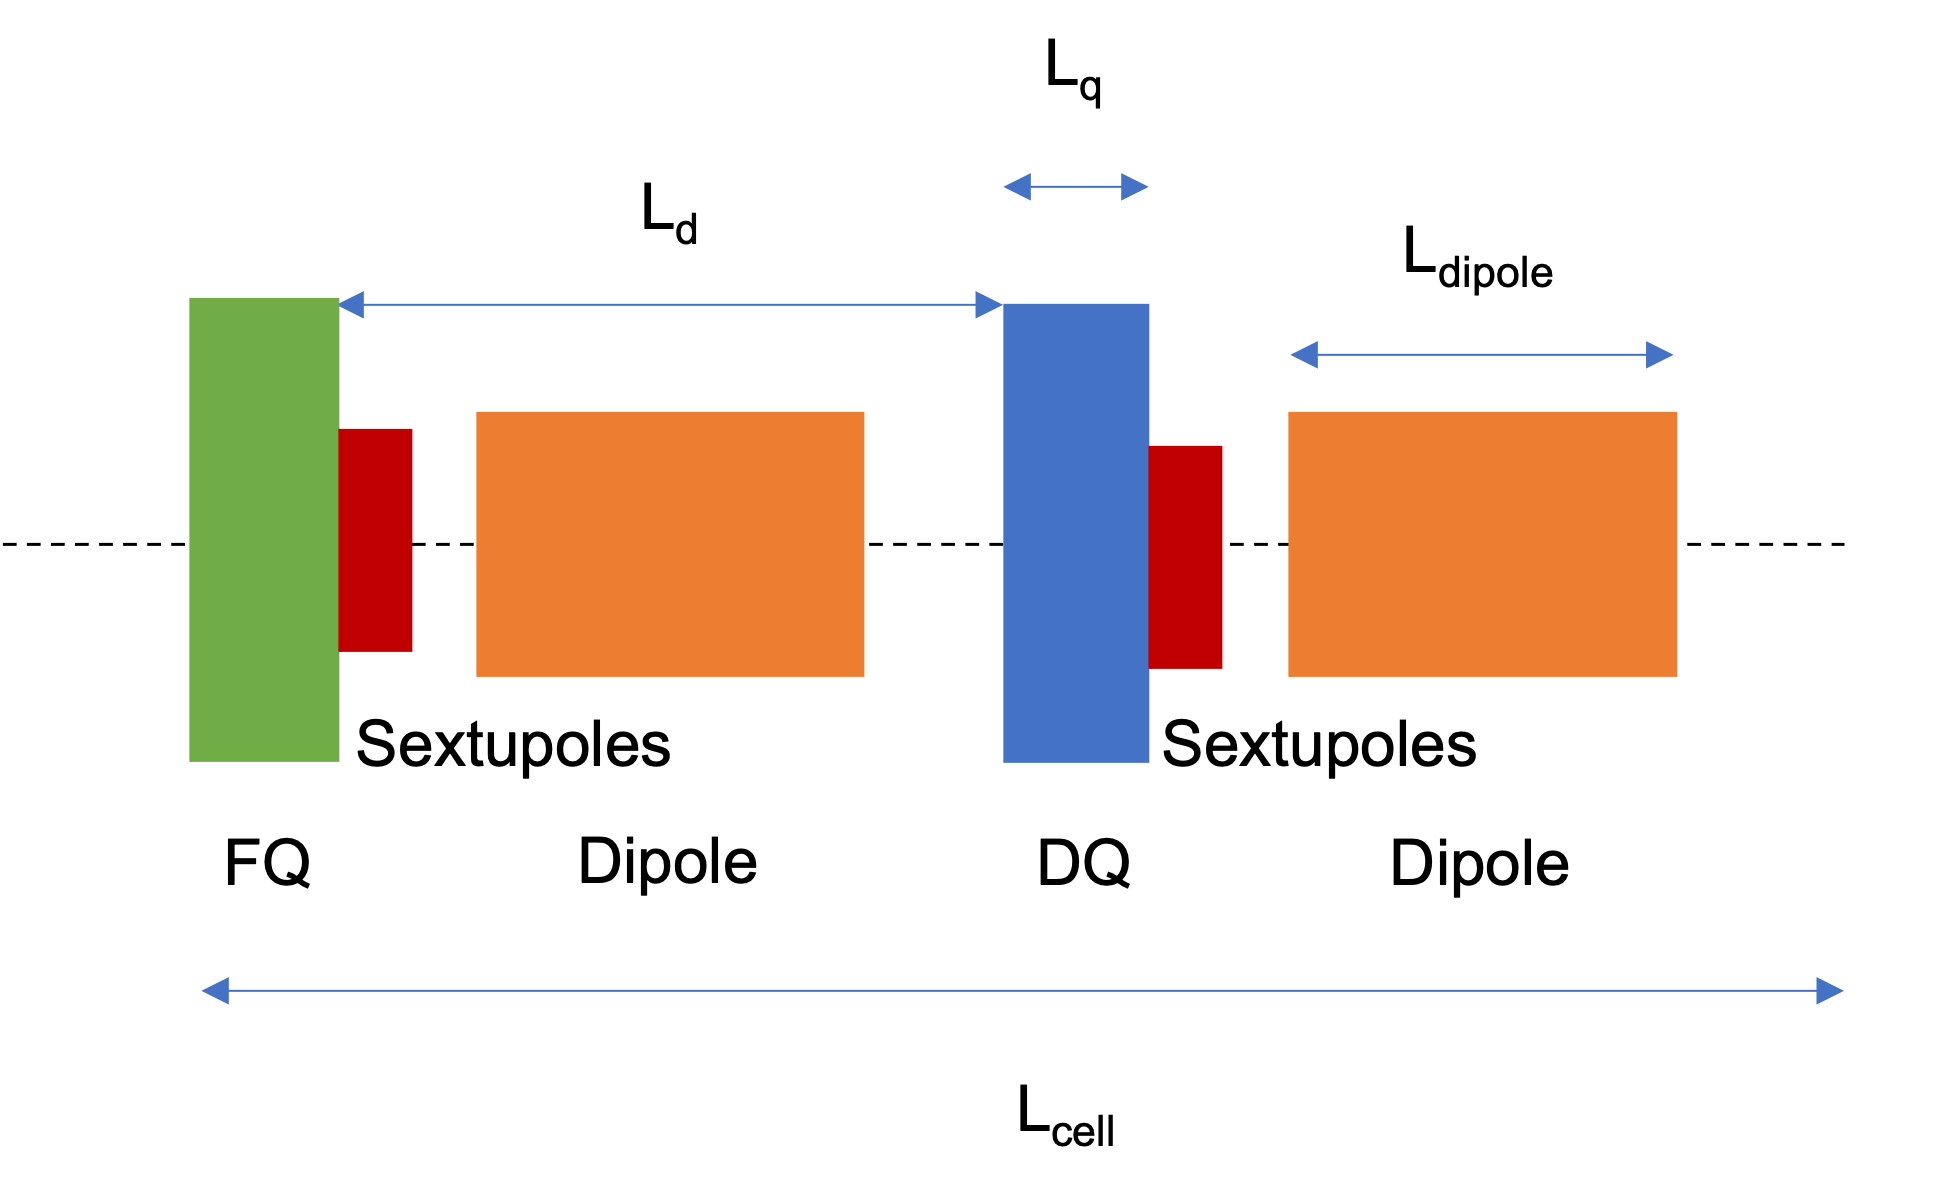
</div>

        !In the magnet definition section:
        SF: SEXTUPOLE, L:=??, K2:=??;
        SD: SEXTUPOLE, L:=??, K2:=??;
        
        !In the sequence:
        S2 : SD, at=??;
        

#### 2. Using the 𝐾21 and 𝐾21, 𝛽-function and dispersion at the sextupole location, evaluate using the formula the sextupolar effect on the Q1 for a particle at DELTAP=0.01. Compare with the results obtained in the Tutorial 4. 

#### **Sextupoles contribution to the chromaticity from the formulas:
#### $\xi = \frac{1}{4*\pi}*(\beta_{x,S1}*K2_1*Dx_{S1}+\beta_{x,S2}*K2_2*Dx_{S2})$**

#### 3. Track a particle with initial coordinates x,y,px,py = (1,1,0,0) mm in 100 cells and DELTAP=0.01. Plot the x-px phase space. Did you manage to recover the original tune for the off-momentum particle? 
    
#### **REMEMEBER** to make thin your lattice to use the TRACK command.

        track, dump;    
        start, x=1e-3, px=0, y=1e-3, py=0;    
        run, turns=100;   
        endtrack; 
 
 #### **REMEMEBER** that in order to use the TRACK command you need to convert your lattice into a thin lattice. You will need the following commands:
    
        select, flag=MAKETHIN, SLICE=5;
        MAKETHIN, SEQUENCE=MY_SEQUENCE;
        use, sequence=MY_SEQUENCE;
        
#### **It is important when defining the SEQUENCE to refer to the the center, to make it compatible with the makethin command! So you may need to re-define the s location in your sequence accordingly.**


#### 4. Track a particle with initial coordinates x,y,px,py=(100,100,0,0). How does the particle move in the phase space, cell after cell? Do you see the tunes? What is going on? 

#### **BONUS**

#### 5. Move the tunes to (0.23, 0.23) and repeat the previous point. Is now the particle stable? 